<a href="https://colab.research.google.com/github/dobrashkaxd/pytorch-cnn/blob/main/pytorch-cnn-transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## self-made ~billioner~ torch cnn



In [ ]:
import os
import random
import gdown
import zipfile
from tqdm.autonotebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

<ipython-input-1-ecaac354c324>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
with torch.no_grad():
  torch.cuda.empty_cache()

In [ ]:
if not os.path.exists('cat_dog_dataset'):
    os.makedirs('cat_dog_dataset')
cat_dog_url = 'https://drive.google.com/uc?id=1YQ2PX-BZ_7uZ216qmAnx-nTCaEqozuCZ'
zip_file_path = 'cat_dog_dataset/cat_dog_dataset.zip'
gdown.download(cat_dog_url, zip_file_path, quiet=False)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('cat_dog_dataset')
os.remove(zip_file_path)

Downloading...
From (original): https://drive.google.com/uc?id=1YQ2PX-BZ_7uZ216qmAnx-nTCaEqozuCZ
From (redirected): https://drive.google.com/uc?id=1YQ2PX-BZ_7uZ216qmAnx-nTCaEqozuCZ&confirm=t&uuid=f700a343-4f25-4071-93b1-b95bdd02dafd
To: /content/cat_dog_dataset/cat_dog_dataset.zip
100%|██████████| 64.3M/64.3M [00:00<00:00, 223MB/s]


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

image_path = "./cat_dog_dataset/"
walk_through_dir(image_path)

There are 1 directories and 0 images in './cat_dog_dataset/'.
There are 2 directories and 0 images in './cat_dog_dataset/data3'.
There are 0 directories and 1000 images in './cat_dog_dataset/data3/cats'.
There are 0 directories and 1000 images in './cat_dog_dataset/data3/dogs'.


In [ ]:
# Определим пути к данным
data_dir = './cat_dog_dataset/data3'

# Определим преобразования для аугментации данных
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

# Создадим датасеты из изображений в папках
dataset = ImageFolder(root=data_dir, transform=transform)

# Разделим датасет на обучающий и тестовый наборы данных
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Создадим загрузчики данных
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Количество изображений в обучающем наборе данных:", len(train_dataset))
print("Количество изображений в тестовом наборе данных:", len(test_dataset))

Количество изображений в обучающем наборе данных: 1600
Количество изображений в тестовом наборе данных: 400


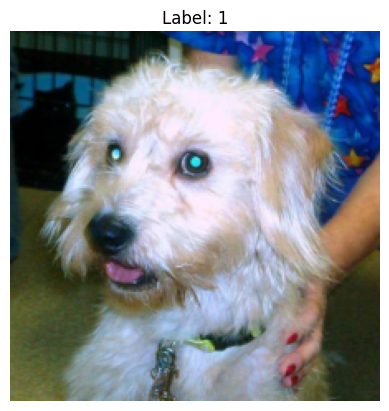

In [ ]:
index = np.random.randint(len(train_dataset))
image, label = train_dataset[index]

image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

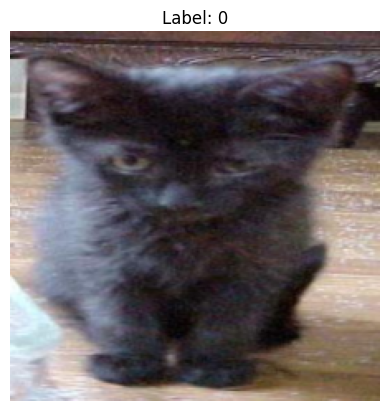

In [ ]:
index = np.random.randint(len(test_dataset))
image, label = test_dataset[index]

image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

In [ ]:
class_names = dataset.classes
print("Class names: ",class_names)

class_dict = dataset.class_to_idx
print("Class names as a dict: ",class_dict)

print("The lengths of the training and test sets: ", len(train_dataset), len(test_dataset))

Class names:  ['cats', 'dogs']
Class names as a dict:  {'cats': 0, 'dogs': 1}
The lengths of the training and test sets:  1600 400


In [ ]:
img, label = train_dataset[0][0], train_dataset[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 224, 224])
Image datatype: torch.float32
Image label: 1
Label datatype: <class 'int'>


In [ ]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
          nn.Conv2d(3, 64, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(64), # посмотреть
          nn.MaxPool2d(2))
        self.conv_layer_2 = nn.Sequential(
          nn.Conv2d(64, 512, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.conv_layer_3 = nn.Sequential(
          nn.Conv2d(512, 512, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=512*3*3, out_features=2))
    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x

In [ ]:
model = ImageClassifier()
model

ImageClassifier(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(64, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_3): Sequential(
    (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model = model.to(device)

losses_train = []
losses_test = []
total_loss = []

num_epochs = 5
for epoch in range(num_epochs):
    # Обучение
    model.train()  # переводим модель в режим обучения
    running_train_loss = 0.0
    for images, labels in train_loader:
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Прямой проход
        outputs = model(images.to(device))
        # Вычисляем потери
        loss = criterion(outputs, labels.to(device))
        losses_train.append(loss.detach().cpu().numpy().item())
        # Обратный проход и оптимизация
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    total_loss.append(np.mean(losses_train))
    # Тестирование
    model.eval()  # переводим модель в режим тестирования
    running_test_loss = 0.0
    for images, labels in test_loader:
        outputs = model(images.to(device))
        loss = criterion(outputs, labels.to(device))
        losses_test.append(loss.detach().cpu().numpy().item())
        running_test_loss += loss.item()

    # Выводим средние потери на обучающем и тестовом наборах данных
    train_loss = running_train_loss / len(train_loader)
    test_loss = running_test_loss / len(test_loader)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Test Loss: {test_loss}")

print('Training Finished')

Epoch 1, Train Loss: 1.0554475557804108, Test Loss: 0.8959496021270752
Epoch 2, Train Loss: 1.023514875769615, Test Loss: 0.7518600683945876
Epoch 3, Train Loss: 0.8732000589370728, Test Loss: 1.1537070732850294
Epoch 4, Train Loss: 0.8790026092529297, Test Loss: 0.9176485538482666
Epoch 5, Train Loss: 0.7714819896221161, Test Loss: 1.0792226607982929
Training Finished


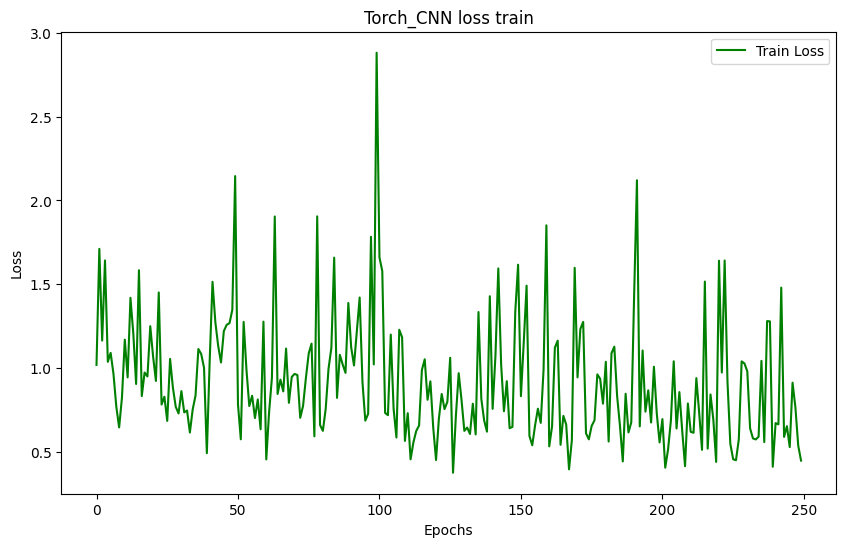

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses_train)),
         losses_train,
         label='Train Loss',
         color='g',
         linestyle="-"
         )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Torch_CNN loss train")
plt.legend()
plt.show()

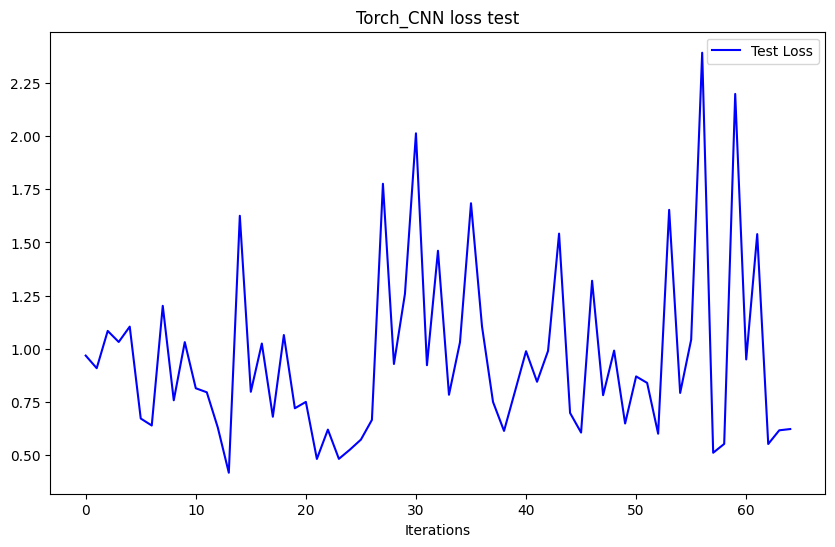

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses_test)),
         losses_test,
         label='Test Loss',
         color='b',
         linestyle="-"
         )
plt.title('Test Loss over Iterations')
plt.xlabel('Iterations')
plt.title("Torch_CNN loss test")
plt.legend()
plt.show()

In [ ]:
random_index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[random_index]
image = image.unsqueeze(0)  # добавляем размерность батча

model.eval()
with torch.no_grad():
    output = model(image.to(device))

predicted_class = torch.argmax(output, dim=1).item()
print("Предсказанная метка:", predicted_class)
print("Фактическая метка:", label)

Предсказанная метка: 0
Фактическая метка: 1


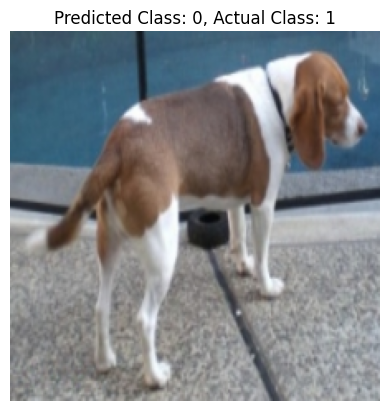

In [ ]:
image = image.squeeze().cpu().numpy()

plt.imshow(np.transpose(image, (1, 2, 0)))
plt.title(f'Predicted Class: {predicted_class}, Actual Class: {label}')
plt.axis('off')
plt.show()

# predtrained model

In [ ]:
import gdown
import gzip
import zipfile
import os
import tarfile
import shutil

import torchvision
from torchvision.datasets import DatasetFolder
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import torch
from torchvision import transforms
import torchvision.transforms as transforms

import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

import numpy as np
import random
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from torch.utils.data import Dataset
from PIL import Image

In [ ]:
with torch.no_grad():
  torch.cuda.empty_cache()

In [ ]:
dataset_dir = './caltech-101'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

url = 'https://data.caltech.edu/records/mzrjq-6wc02/files/caltech-101.zip'
zip_file_path = os.path.join(dataset_dir, 'caltech-101.zip')
gdown.download(url, zip_file_path, quiet=False)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

os.remove(zip_file_path)

data_dir = os.path.join(dataset_dir, 'caltech-101')
classes = os.listdir(data_dir)
print("Список классов в датасете:", classes)

Downloading...
From: https://data.caltech.edu/records/mzrjq-6wc02/files/caltech-101.zip
To: /content/caltech-101/caltech-101.zip
100%|██████████| 137M/137M [00:01<00:00, 68.7MB/s]


Список классов в датасете: ['101_ObjectCategories.tar.gz', 'Annotations.tar', 'show_annotation.m']


In [ ]:
annotations_tar_path = os.path.join(data_dir, 'Annotations.tar')
with tarfile.open(annotations_tar_path, 'r') as tar:
    tar.extractall(data_dir)

categories_gz_path = os.path.join(data_dir, '101_ObjectCategories.tar.gz')
categories_tar_path = os.path.join(data_dir, '101_ObjectCategories.tar')
with gzip.open(categories_gz_path, 'rb') as gz, open(categories_tar_path, 'wb') as tar:
    shutil.copyfileobj(gz, tar)

with tarfile.open(categories_tar_path, 'r') as tar:
    tar.extractall(data_dir)

Архив 'Annotations.tar' успешно распакован.
Архив '101_ObjectCategories.tar.gz' успешно распакован.


In [ ]:
selected_classes = ['beaver', 'Motorbikes', 'garfield']

data_dir = './caltech-101/caltech-101/101_ObjectCategories'

class_folders = [os.path.join(data_dir, class_name) for class_name in selected_classes]

transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

images = []
labels = []
for class_folder, class_name in zip(class_folders, selected_classes):
    image_files = [os.path.join(class_folder, file) for file in os.listdir(class_folder) if file.endswith('.jpg')]
    images.extend(image_files)
    labels.extend([selected_classes.index(class_name)] * len(image_files))

data = list(zip(images, labels))
random.shuffle(data)

train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

class CustomDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label

train_dataset = CustomDataset(train_data, transform=transform)
test_dataset = CustomDataset(test_data, transform=transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Количество изображений в обучающем наборе данных:", len(train_dataset))
print("Количество изображений в тестовом наборе данных:", len(test_dataset))

Количество изображений в обучающем наборе данных: 702
Количество изображений в тестовом наборе данных: 176


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

inception_model = models.inception_v3(pretrained=True)
vgg_model = models.vgg19(pretrained=True)

for param in inception_model.parameters():
    param.requires_grad = False

for param in vgg_model.parameters():
    param.requires_grad = False

# изменяем последний слой классификатора
inception_model.fc = nn.Linear(inception_model.fc.in_features, len(selected_classes))
vgg_model.classifier[6] = nn.Linear(vgg_model.classifier[6].in_features, len(selected_classes))

inception_model = inception_model.to(device)
vgg_model = vgg_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 153MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated sin

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_inception = optim.Adam(inception_model.fc.parameters(), lr=0.001)
optimizer_vgg = optim.Adam(vgg_model.classifier[6].parameters(), lr=0.001)

In [ ]:
for images, labels in train_loader:
  print('images= ', images)
  print('labels=', labels)

images=  tensor([[[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          ...,
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
          [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

         [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          ...,
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
          [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

         [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
          [2.6400, 2.6400, 2.6400

In [ ]:
inception_model.train()
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer_inception.zero_grad()
        outputs = inception_model(images)
        logits = outputs.logits

        loss = criterion(logits, labels)
        loss.backward()
        optimizer_inception.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'inception_model Epoch [{epoch + 1}/5], Loss: {epoch_loss:.4f}')

vgg_model.train()
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer_vgg.zero_grad()
        outputs = vgg_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_vgg.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'vgg_model Epoch [{epoch + 1}/5], Loss: {epoch_loss:.4f}')

inception_model Epoch [1/5], Loss: 0.4137
inception_model Epoch [2/5], Loss: 0.2104
inception_model Epoch [3/5], Loss: 0.1265
inception_model Epoch [4/5], Loss: 0.0736
inception_model Epoch [5/5], Loss: 0.0517
vgg_model Epoch [1/5], Loss: 0.2412
vgg_model Epoch [2/5], Loss: 0.0106
vgg_model Epoch [3/5], Loss: 0.0035
vgg_model Epoch [4/5], Loss: 0.0037
vgg_model Epoch [5/5], Loss: 0.0025


In [ ]:
inception_model.eval()

predictions = []
true_labels = []

for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = inception_model(images)
        probabilities = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(probabilities, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

predictions = np.array(predictions)
true_labels = np.array(true_labels)
accuracy = accuracy_score(true_labels, predictions)

print("Размерность предсказаний:", predictions.shape)
print("Размерность истинных меток:", true_labels.shape)
print(f'Accuracy: {accuracy * 100:.2f}%')

Размерность предсказаний: (176,)
Размерность истинных меток: (176,)
Accuracy: 99.43%


In [ ]:
predictions

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

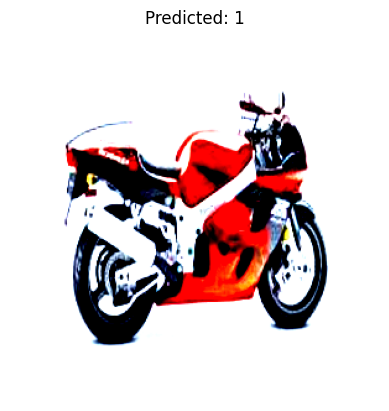

In [ ]:
random_index = np.random.randint(len(test_dataset))
image, label = test_dataset[random_index]

image = image.to(device)

with torch.no_grad():
    output = inception_model(image.unsqueeze(0))
    probabilities = torch.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1)

image = image.cpu().numpy().transpose((1, 2, 0))
image = np.clip(image, 0, 1)  # Отменяем нормализацию

plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted: {predicted_class.item()}')
plt.show()

In [ ]:
vgg_model.eval()

predictions = []
true_labels = []

for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    with torch.no_grad():
        outputs = vgg_model(images)
        probabilities = torch.softmax(outputs, dim=1)
        _, predicted = torch.max(probabilities, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

predictions = np.array(predictions)
true_labels = np.array(true_labels)
accuracy = accuracy_score(true_labels, predictions)

print("Размерность предсказаний:", predictions.shape)
print("Размерность истинных меток:", true_labels.shape)
print(f'Accuracy: {accuracy * 100:.2f}%')

Размерность предсказаний: (176,)
Размерность истинных меток: (176,)
Accuracy: 100.00%


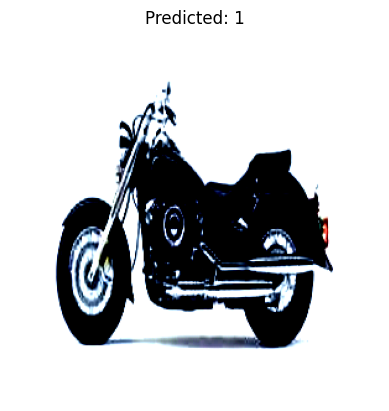

In [ ]:
random_index = np.random.randint(len(test_dataset))
image, label = test_dataset[random_index]

image = image.to(device)

with torch.no_grad():
    output = vgg_model(image.unsqueeze(0))
    probabilities = torch.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1)

image = image.cpu().numpy().transpose((1, 2, 0))
image = np.clip(image, 0, 1)

plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted: {predicted_class.item()}')
plt.show()